sentimen aplikasi zenius

1.instal *lebery*

In [ ]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
import numpy as np


Dataset

In [ ]:
df_review = pd.read_excel("/content/guru_data..xlsx")
df_test = df_review
df_review.head(5)

,userName,ranting,tanggal,ulasan
0,Haqiqi Abdan,4,2022-06-27 13:01:35,Untuk device laptop apa memang belum ada fitur...
1,Bhaskar Elvandio Premanaputra,4,2022-06-27 11:27:48,"Pihak ruang guru,tolong ya,setiap kali sya men..."
2,syella herlin,1,2022-06-27 11:12:16,Halo kak ini semenjak update tidak bisa dibuka...
3,Nur Annisa Wiryani,4,2022-06-27 07:23:30,ruangguru punya fitur yang menurut aku lengkap...
4,Hasni Ibrahim,5,2022-06-27 04:01:23,Belajar di ruangguru sangat menyenangkan.... J...


In [ ]:
df_as = pd.read_excel("/content/guru_data..xlsx")

In [ ]:
df_as['ranting'].value_counts()

5    1029
4     195
3     124
1      93
2      59
Name: ranting, dtype: int64

Menampilkan grafik frekuensi rating

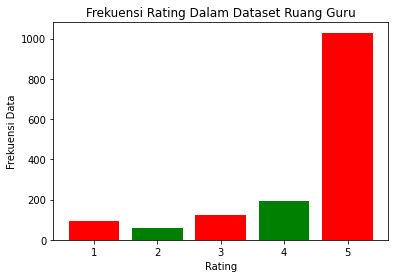

In [ ]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [93, 59, 124, 195, 1029]

# labels for bars
tick_label = [1, 2, 3, 4, 5]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Rating')
# naming the y-axis
plt.ylabel('Frekuensi Data')
# plot title
plt.title('Frekuensi Rating Dalam Dataset Ruang Guru')

# function to show the plot
plt.show()

#jumlah rating

In [ ]:
df_review["ranting"].value_counts()

5    1029
4     195
3     124
1      93
2      59
Name: ranting, dtype: int64

2.plabelan

In [ ]:
sentimen = []
for index, row in df_review.iterrows():
     if row['ranting']>=3:
        sentimen.append('positif')
     else:
       sentimen.append('negatif')
df_review['sentimen'] = sentimen
df_review = df_review.drop(columns=['ranting'])
df_review.head()

,userName,tanggal,ulasan,sentimen
0,Haqiqi Abdan,2022-06-27 13:01:35,Untuk device laptop apa memang belum ada fitur...,positif
1,Bhaskar Elvandio Premanaputra,2022-06-27 11:27:48,"Pihak ruang guru,tolong ya,setiap kali sya men...",positif
2,syella herlin,2022-06-27 11:12:16,Halo kak ini semenjak update tidak bisa dibuka...,negatif
3,Nur Annisa Wiryani,2022-06-27 07:23:30,ruangguru punya fitur yang menurut aku lengkap...,positif
4,Hasni Ibrahim,2022-06-27 04:01:23,Belajar di ruangguru sangat menyenangkan.... J...,positif


In [ ]:
df_review['sentimen'].value_counts()

positif    1348
negatif     152
Name: sentimen, dtype: int64

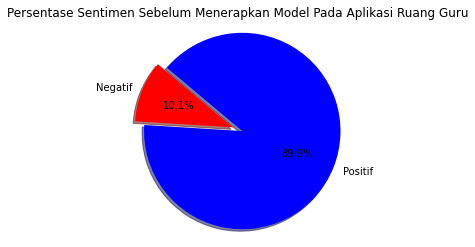

Negatif = 152
Positif = 1348
Jumlah Keseluruhan Data = 1500


In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [152, 1348]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Sebelum Menerapkan Model Pada Aplikasi Ruang Guru")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

3.menghilangkan tabel yang tidak digunakan

In [ ]:
df_preprocessed = df_review.copy()
df_preprocessed = df_preprocessed.drop (columns=['userName', 'tanggal'])
df_preprocessed.head()

,ulasan,sentimen
0,Untuk device laptop apa memang belum ada fitur...,positif
1,"Pihak ruang guru,tolong ya,setiap kali sya men...",positif
2,Halo kak ini semenjak update tidak bisa dibuka...,negatif
3,ruangguru punya fitur yang menurut aku lengkap...,positif
4,Belajar di ruangguru sangat menyenangkan.... J...,positif


In [ ]:
df_preprocessed['sentimen'].value_counts()

positif    1348
negatif     152
Name: sentimen, dtype: int64

#cleansing

In [ ]:
import string, re

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [ ]:
#jalankan cleansing data
review =[]
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["ulasan"]))

df_preprocessed["ulasan"] = review
df_preprocessed.head()


,ulasan,sentimen
0,untuk device laptop apa memang belum ada fitur...,positif
1,pihak ruang guru tolong ya setiap kali sya men...,positif
2,halo kak ini semenjak update tidak bisa dibuka...,negatif
3,ruangguru punya fitur yang menurut aku lengkap...,positif
4,belajar di ruangguru sangat menyenangkan j...,positif


In [ ]:
df_as['ulasan'].iloc[3]

'ruangguru punya fitur yang menurut aku lengkap banget. Tapi sayangnya volume suara dari video pembelajaran nya sering kali kecil, jadinya pas belajar aga terganggu'

In [ ]:
df_as['ulasan'].iloc[110]

'Apk ini sangatlah membantu cara untuk memecahkan rumus rumus yg saya tidak paham'

In [ ]:
text = df_as['ulasan'].iloc[110]
print(cleansing(text))

apk ini sangatlah membantu cara untuk memecahkan rumus rumus yg saya tidak paham


#remove stopword

In [ ]:
!pip install Sastrawi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libary
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

#contoh
kalimat ='Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur" keren lagi ya'
stop = stopword.remove(kalimat)
print(stop)


Aplikasi yg keren nih, khususnya fitur terbaru ZenCore.. Kita melatih kemampuan belajar CorePractice berkali-kali.. Belajar jadi lebih asik nyaman.. Semoga kedepannya muncul fitur" keren ya


In [ ]:
text = df_as['ulasan'].iloc[30]
txt = cleansing(text)
text2 = stopword.remove(txt)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)

Awal :  Terimakasih ruang guru saya lolos Sbmptn karena giat belajar di ruang guru. Tapi mohon dibenahi untuk pemilihan jawaban kuis nya kadang eror. Dan tingkat kan kualitas resolusi vidio nya
Cleansing :  terimakasih ruang guru saya lolos sbmptn karena giat belajar di ruang guru  tapi mohon dibenahi untuk pemilihan jawaban kuis nya kadang eror  dan tingkat kan kualitas resolusi vidio nya
Stopword :  terimakasih ruang guru lolos sbmptn giat belajar ruang guru  mohon dibenahi pemilihan jawaban kuis nya kadang eror  tingkat kan kualitas resolusi vidio nya


In [ ]:
review = []
for index, row in df_preprocessed.iterrows():
     review.append(stopword.remove(row["ulasan"]))

df_preprocessed["ulasan"] = review
df_preprocessed.head()

,ulasan,sentimen
0,device laptop apa memang ada fitur adapto nya,positif
1,pihak ruang guru ya kali sya menonton dafa lul...,positif
2,halo kak semenjak update bisa dibuka tampilan ...,negatif
3,ruangguru punya fitur menurut aku lengkap bang...,positif
4,belajar ruangguru sangat menyenangkan jang...,positif


#steaming

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
Stemmer = factory.create_stemmer()
#contoh
kalimat = 'Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur" keren lagi ya'
katadasar = Stemmer.stem(kalimat)
print(katadasar)

aplikasi yg keren nih khusus untuk fitur baru zencore kita bisa latih mampu ajar di corepractice kali ajar jadi lebih asik dan nyaman moga depan muncul fitur keren lagi ya


In [ ]:
text = df_as['ulasan'].iloc[28]
txt = cleansing(text)
text2 = stopword.remove(txt)
text3 = Stemmer.stem(text2)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)
print("Stemming : ", text3)

Awal :  Pengalaman pakek Ruangguru oke banget, saya berlangganan 9 bulan untuk gapyear dan mengikuti sekitar 10 tryout premium, Alhamdulillah masuk di pilihan ke dua yaitu UIN Jakarta, jurusan manajemen.
Cleansing :  pengalaman pakek ruangguru oke banget  saya berlangganan 9 bulan untuk gapyear dan mengikuti sekitar 10 tryout premium  alhamdulillah masuk di pilihan ke dua yaitu uin jakarta  jurusan manajemen 
Stopword :  pengalaman pakek ruangguru oke banget  berlangganan 9 bulan gapyear mengikuti 10 tryout premium  alhamdulillah masuk pilihan dua uin jakarta  jurusan manajemen 
Stemming :  alam pakek ruangguru oke banget langgan 9 bulan gapyear ikut 10 tryout premium alhamdulillah masuk pilih dua uin jakarta jurus manajemen


In [ ]:
#implementasi pada data kita
review = []
for index, row in df_preprocessed.iterrows():
     review.append(Stemmer.stem(row["ulasan"]))

df_preprocessed["ulasan"] = review
df_preprocessed.head()

,ulasan,sentimen
0,device laptop apa memang ada fitur adapto nya,positif
1,pihak ruang guru ya kali sya tonton dafa lulu ...,positif
2,halo kak semenjak update bisa buka tampil blac...,negatif
3,ruangguru punya fitur turut aku lengkap banget...,positif
4,ajar ruangguru sangat senang jangan lupa dafta...,positif


In [ ]:
df_preprocessed.to_excel("zen.xlsx", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

In [ ]:
def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  #data = vectorizer.transform([data])
  return data

In [ ]:
text = df_as['ulasan'].iloc[33]
print("text asli : ",text)
print("text prepocess : ",preprocess_data(text))

text asli :  Tolong dong cicilannya bisa lebih dari 3x. Soalnya ini bayarnya pakek duit jajan jadi, tiap bulan cuma kekumpul dikit, udah dikit mau di pakek buat paket internet pula hadehh. Mau joinan akun tapi takut di bohongi temen T-T
text prepocess :  dong cicil lebih 3x soal bayar pakek duit jajan jadi tiap bulan cuma kumpul dikit udah dikit mau pakek buat paket internet hadehh mau joinan akun takut bohong temen t t


menbagi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_preprocessed['ulasan'],df_preprocessed['sentimen'],
                                                   test_size=0.2, stratify=df_preprocessed['sentimen'], random_state=0)

pembobotan TFID

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

AttributeError: ignored

In [ ]:
kamus = vectorizer.vocabulary_
kamus["aku"]

135

In [ ]:
def preprocess_data2(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  vector = []
  kalimat = data.split()
  for i in kalimat:
    vec = kamus.get(i)
    vector.append(vec)
  return vector

In [ ]:
def preprocess_data3(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  data = vectorizer.transform([data])
  return data

In [ ]:
data = "suka ruang guru"
print(preprocess_data3(data))

  (0, 2742)	0.7011036044250224
  (0, 2397)	0.508049603485779
  (0, 1009)	0.5003392211891695


In [ ]:
data = "suka ruang guru"
print(preprocess_data2(data))

[2742, 2397, 1009]


In [ ]:
df_asu = df_as.astype({"ulasan":str})

In [ ]:
df_as.dtypes

userName            object
ranting              int64
tanggal     datetime64[ns]
ulasan              object
dtype: object

In [ ]:
df_asu['ulasan'][0]

'Untuk device laptop apa memang belum ada fitur adapto nya ya?'

In [ ]:
df_asu['pembobotan'] = ""
for j in range(0,len(df_asu['ulasan'])):
  df_asu['pembobotan'][j] = preprocess_data2(df_asu['ulasan'][j])

In [ ]:
df_asu.head()

,userName,ranting,tanggal,ulasan
0,Haqiqi Abdan,4,2022-06-27 13:01:35,Untuk device laptop apa memang belum ada fitur...
1,Bhaskar Elvandio Premanaputra,4,2022-06-27 11:27:48,"Pihak ruang guru,tolong ya,setiap kali sya men..."
2,syella herlin,1,2022-06-27 11:12:16,Halo kak ini semenjak update tidak bisa dibuka...
3,Nur Annisa Wiryani,4,2022-06-27 07:23:30,ruangguru punya fitur yang menurut aku lengkap...
4,Hasni Ibrahim,5,2022-06-27 04:01:23,Belajar di ruangguru sangat menyenangkan.... J...


In [ ]:
sentimen = []
for index, row in df_asu.iterrows():
     if row['ranting']>=3:
        sentimen.append('positif')
     else:
       sentimen.append('negatif')
df_asu['sentimen'] = sentimen
df_asu.head()

,userName,ranting,tanggal,ulasan,sentimen
0,Haqiqi Abdan,4,2022-06-27 13:01:35,Untuk device laptop apa memang belum ada fitur...,positif
1,Bhaskar Elvandio Premanaputra,4,2022-06-27 11:27:48,"Pihak ruang guru,tolong ya,setiap kali sya men...",positif
2,syella herlin,1,2022-06-27 11:12:16,Halo kak ini semenjak update tidak bisa dibuka...,negatif
3,Nur Annisa Wiryani,4,2022-06-27 07:23:30,ruangguru punya fitur yang menurut aku lengkap...,positif
4,Hasni Ibrahim,5,2022-06-27 04:01:23,Belajar di ruangguru sangat menyenangkan.... J...,positif


In [ ]:
df_asu.to_excel(r'/content/RuangGuruPembobotan.xlsx', index = False)

hasil pembobotan tfid

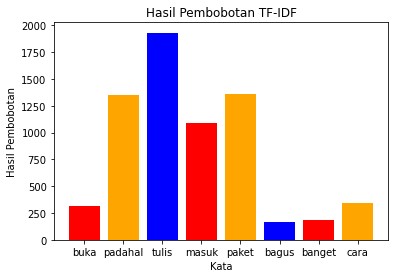

In [ ]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5,6,7,8]

# heights of bars
height = [316, 1348, 1931, 1093, 1357,167,185,344]

# labels for bars
tick_label = ["buka", "padahal", "tulis", "masuk", "paket","bagus","banget","cara"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue'])

# naming the x-axis
plt.xlabel('Kata')
# naming the y-axis
plt.ylabel('Hasil Pembobotan')
# plot title
plt.title('Hasil Pembobotan TF-IDF')

# function to show the plot
plt.show()

merubah data training dan test ke data vektor menggunakan pembobotan tfid

In [ ]:
#pada data kita
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test).todense()

print(x_test.shape)
print(x_test.shape)

(300, 3179)
(300, 3179)


In [ ]:
count_array = x_train.toarray()
dfa = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_train[0])

  (0, 1699)	0.07268396445933245
  (0, 1405)	0.10482662516186307
  (0, 199)	0.0953461575792709
  (0, 2008)	0.15953739158601876
  (0, 1388)	0.16878854908005003
  (0, 1858)	0.13206735332966046
  (0, 659)	0.1402053065457773
  (0, 1291)	0.08549454012162158
  (0, 1820)	0.15953739158601876
  (0, 759)	0.1402053065457773
  (0, 2098)	0.0876691526012706
  (0, 1046)	0.11116111577338798
  (0, 1310)	0.06953190398955997
  (0, 2247)	0.16878854908005003
  (0, 1555)	0.12281619583562918
  (0, 2464)	0.14788231152377754
  (0, 1254)	0.08143364766239275
  (0, 985)	0.15953739158601876
  (0, 2979)	0.1402053065457773
  (0, 333)	0.13458095972224063
  (0, 539)	0.12989274085001146
  (0, 453)	0.14372243339190166
  (0, 1400)	0.14372243339190166
  (0, 893)	0.11513919085762891
  (0, 1808)	0.11865631770375329
  :	:
  (0, 2887)	0.07537132125327792
  (0, 565)	0.11306356405062694
  (0, 1645)	0.09580710581738743
  (0, 312)	0.16294044220657466
  (0, 361)	0.11742271123741706
  (0, 832)	0.13206735332966046
  (0, 1505)	0.11306

#preproses data

proses svm

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC()
svm.fit(x_train, y_train)

LinearSVC()

Menampilkan akurasi

In [ ]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(x_test)))

Accuracy score model final: 0.9033333333333333 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Lakukan prediksi terhadap seluruh dataset ruang guru

In [ ]:
dfZen = pd.read_excel("/content/guru_data..xlsx")
dfZen.head()

,userName,ranting,tanggal,ulasan
0,Haqiqi Abdan,4,2022-06-27 13:01:35,Untuk device laptop apa memang belum ada fitur...
1,Bhaskar Elvandio Premanaputra,4,2022-06-27 11:27:48,"Pihak ruang guru,tolong ya,setiap kali sya men..."
2,syella herlin,1,2022-06-27 11:12:16,Halo kak ini semenjak update tidak bisa dibuka...
3,Nur Annisa Wiryani,4,2022-06-27 07:23:30,ruangguru punya fitur yang menurut aku lengkap...
4,Hasni Ibrahim,5,2022-06-27 04:01:23,Belajar di ruangguru sangat menyenangkan.... J...


In [ ]:
prediction = []
for i in range(0,len(dfZen['ulasan'])):
  predict_transform = vectorizer.transform([dfZen['ulasan'][i]])
  prediction.append(svm.predict(predict_transform))

In [ ]:
dfZen['predict'] = prediction

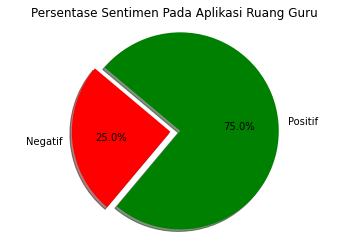

Negatif = 375
Positif = 1125
Jumlah Keseluruhan Data = 1500


In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [375, 1125]
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Pada Aplikasi Ruang Guru")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

In [ ]:
dfZen.to_excel("zenPredict.xlsx", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

#evaluasi model svm

Evaluasi dan menampilkan confussion matrix untuk menghitung evaluasi

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = svm.predict(x_test)
print('Accuracy of SVM classifier on test set : {:.2f}'.format(svm.score(x_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set : 0.90
[[  9  21]
 [  8 262]]
              precision    recall  f1-score   support

     negatif       0.53      0.30      0.38        30
     positif       0.93      0.97      0.95       270

    accuracy                           0.90       300
   macro avg       0.73      0.64      0.67       300
weighted avg       0.89      0.90      0.89       300



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


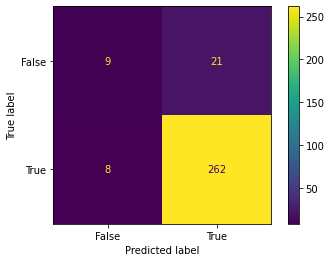

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()